In [14]:
'''
Trying to figure out if there is a pattern to when stuff crashes.
'''

import subprocess
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


def run(flags: list[str]) -> float | None:
    try:
        s = subprocess.run(['cargo', 'run', '--release', '--', '--no-warnings'] + flags, stderr=subprocess.PIPE, stdout=subprocess.DEVNULL, timeout=10)
    except subprocess.TimeoutExpired:
        print(f'timeout with flags {" ".join(flags)}')
        return
    msg = s.stderr.decode('utf-8')
    match = re.search(r'next_sync_step: ([^\n]+)\n', msg)
    if match:
        death_time = float(match.group(1))
        return death_time



 69%|██████▉   | 34/49 [00:46<00:55,  3.72s/it]

timeout at 66


 92%|█████████▏| 45/49 [01:04<00:15,  3.78s/it]

timeout at 90


100%|██████████| 49/49 [01:07<00:00,  1.37s/it]


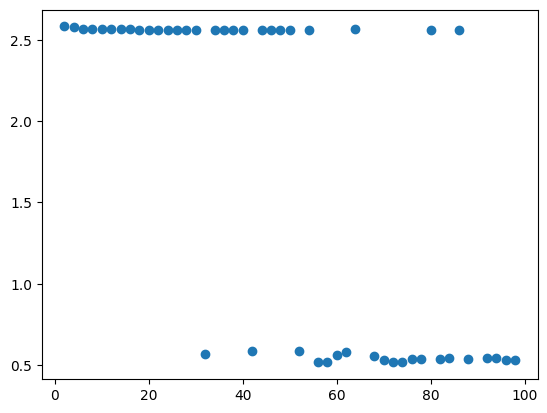

In [6]:
data = []
for i in tqdm(range(2, 100, 2)):
    # print(i, 'prep to run sim', end=' ')
    crash_time = run(['--particles', str(i)])
    if crash_time:
        data.append((i, crash_time))
particles, death_time = zip(*data)

plt.scatter(particles, death_time)

24it [00:03,  6.17it/s]


Text(0, 0.5, 't at crash')

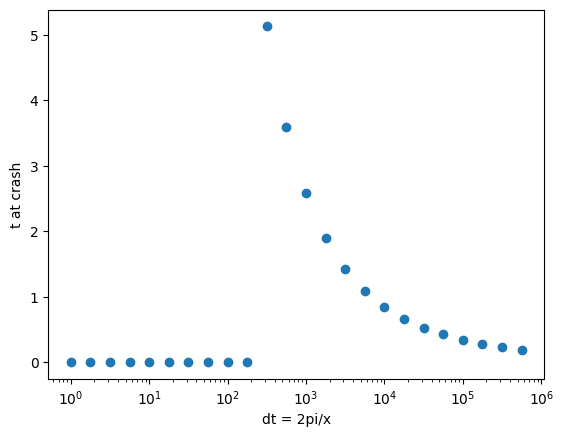

In [20]:


data = []
for i in tqdm(map(lambda x: 10**x, np.arange(0, 6, 0.25))):
    # print(i, 'prep to run sim', end=' ')
    steps = int(i)
    crash_time = run(['--particles', '2', '--steps-in-2pi', str(steps), '--big-steps', str(steps)])
    if crash_time:
        data.append((i, crash_time))
    else:
        data.append((i, 0))
particles, death_time = zip(*data)

fig = plt.figure()
ax = plt.gca()
ax.scatter(particles, death_time)
ax.set_xscale('log')
ax.set_xlabel('dt = 2pi/x')
ax.set_ylabel('t at crash')


<Axes: xlabel='step', ylabel='X'>

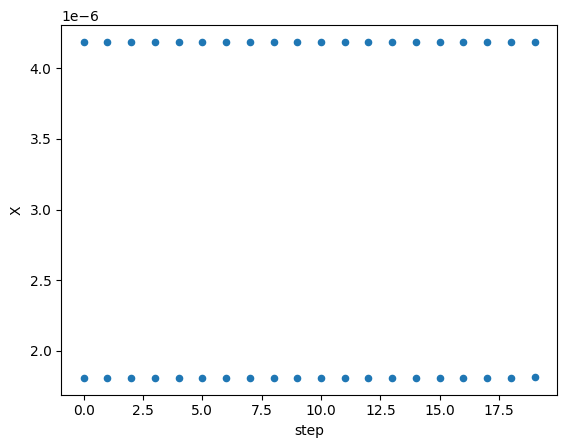

In [35]:
import pandas as pd

raw_data = pd.read_csv('../demo_big_sim_hills_sliding_brick.csv', header=None, names=['X', 'Y', 'Z', 'radius', 'step'], sep=' ')
raw_data.loc[raw_data['step'] < 20].plot.scatter(x='step', y='X')